<h1> <center>Data Integration & Visualization </center></h1>
                                        

# ![title](airplaneimage.jpg)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
airlinesDf = pd.read_csv("airlines.csv")

In [3]:
airportsDf = pd.read_csv("airports.csv")

In [4]:
flightsDf= pd.read_csv("flights.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22408\17542411.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flightsDf= pd.read_csv("flights.csv")


<h2>Data Integration </h2> 
<h5>First we will merge flights table with the airlines table on column Airline from flights and column IATA from airlines</h5>

In [5]:
tempmerge = pd.merge(flightsDf,airlinesDf, left_on= 'AIRLINE',right_on='IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Origin Airport from tempmerge and IATA from airpot</h5>

In [6]:
tempmerge2 = pd.merge(tempmerge,airportsDf,left_on='ORIGIN_AIRPORT',right_on= 'IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Destination Airport from tempmerge2 and IATA from airpot</h5>

In [7]:
df = pd.merge(tempmerge2,airportsDf,left_on='DESTINATION_AIRPORT',right_on= 'IATA_CODE')

<h2>Data Cleaning</h2>

<h4>First we will rename some of the columns to make it easier for us to read</h4>

In [8]:
df.rename(columns={'CITY_x': 'ORIGIN_CITY','AIRLINE_x':'AIRLINE','STATE_x':'ORIGIN_STATE',
'LATITUDE_x':'ORIGIN_LATITUDE','LONGITUDE_x':'ORIGIN_LONGITUDE','CITY_y': 'DESTINATION_CITY',
'STATE_y':'DESTINATION_STATE','LATITUDE_y':'DESTINATION_LATITUDE',
'LONGITUDE_y':'DESTINATION_LONGITUDE'},inplace=True)

<h4>The first feature that we are going to add is the date column we will use the values in the month,and year columns and combine them in a single column and later we will drop them</h4>

In [9]:
df["DATE"] = df['YEAR'].astype(str) +"-"+ df["MONTH"].astype(str) 

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])

<h4>First we will drop unused columns and the columns that has many null values</h4>

In [11]:
df.drop(['DAY','MONTH','YEAR','DAY_OF_WEEK','IATA_CODE_x','TAIL_NUMBER','IATA_CODE_y','IATA_CODE','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY',
'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_y','AIRPORT_x','AIRPORT_y','COUNTRY_y','COUNTRY_x'],axis=1,inplace=True)

<h4>Now we will drop any row that has more than 5 null values</h4>

In [12]:
df = df.dropna(thresh=25)

<h5>Now we will fill the null values in ELAPSED_TIME,AIR_TIME, and ARRIVAL_DELAY  columns based on the FLIGHT_NUMBER mean on their respective columns </h5>

In [13]:
# flights = df['FLIGHT_NUMBER'].unique()
# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['ELAPSED_TIME'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['ELAPSED_TIME'].isnull(),'ELAPSED_TIME'] = flightMean

#     df.loc[flight,'ELAPSED_TIME'] = rows

In [14]:

# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['AIR_TIME'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['AIR_TIME'].isnull(),'AIR_TIME'] = flightMean

#     df.loc[flight,'AIR_TIME'] = rows

In [15]:
# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['ARRIVAL_DELAY'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['ARRIVAL_DELAY'].isnull(),'ARRIVAL_DELAY'] = flightMean

#     df.loc[flight,'ARRIVAL_DELAY'] = rows

<h5>Now we will fill the null values in ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_LATITUDE ,and DESTINATION_LONGITUDE columns based on the ORIGIN_CITY mean on their respective columns </h5>


In [16]:
# ORIGIN_CITY = df['ORIGIN_CITY'].unique()
# for i in range(len(ORIGIN_CITY)):


#     city = df['ORIGIN_CITY']== ORIGIN_CITY[i]

#     cityMean = df.loc[city]['ORIGIN_LATITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['ORIGIN_LATITUDE'].isnull(),'ORIGIN_LATITUDE'] = cityMean

#     df.loc[city,'ORIGIN_LATITUDE'] = rows
#     #longtitude part
#     cityMean = df.loc[city]['ORIGIN_LONGITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['ORIGIN_LONGITUDE'].isnull(),'ORIGIN_LONGITUDE'] = cityMean

#     df.loc[city,'ORIGIN_LONGITUDE'] = rows

In [17]:
# DESTINATION_CITY = df['DESTINATION_CITY'].unique()
# for i in range(len(DESTINATION_CITY)):


#     city = df['DESTINATION_CITY']== DESTINATION_CITY[i]

#     cityMean = df.loc[city]['DESTINATION_LATITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['DESTINATION_LATITUDE'].isnull(),'DESTINATION_LATITUDE'] = cityMean

#     df.loc[city,'DESTINATION_LATITUDE'] = rows
#     #longtitude part
#     cityMean = df.loc[city]['DESTINATION_LONGITUDE'].mean()

#     rows = df.loc[city]
#     rows.loc[rows['DESTINATION_LONGITUDE'].isnull(),'DESTINATION_LONGITUDE'] = cityMean

#     df.loc[city,'DESTINATION_LONGITUDE'] = rows

<h4>The Second feature is the speed of the aircraft we used the distance column and the air time column to calculate the speed of the aircraft</h4>

In [18]:
df["AIRCRAFT_SPEED"] = df['DISTANCE'] / df["AIR_TIME"]

<h4>Now we will search for outliers </h4>

<h5>After reviewing all graphs for outliers these were the 8 features that didnt have outliers </h5>

Text(0.5, 1.0, 'AIRCRAFT_SPEED')

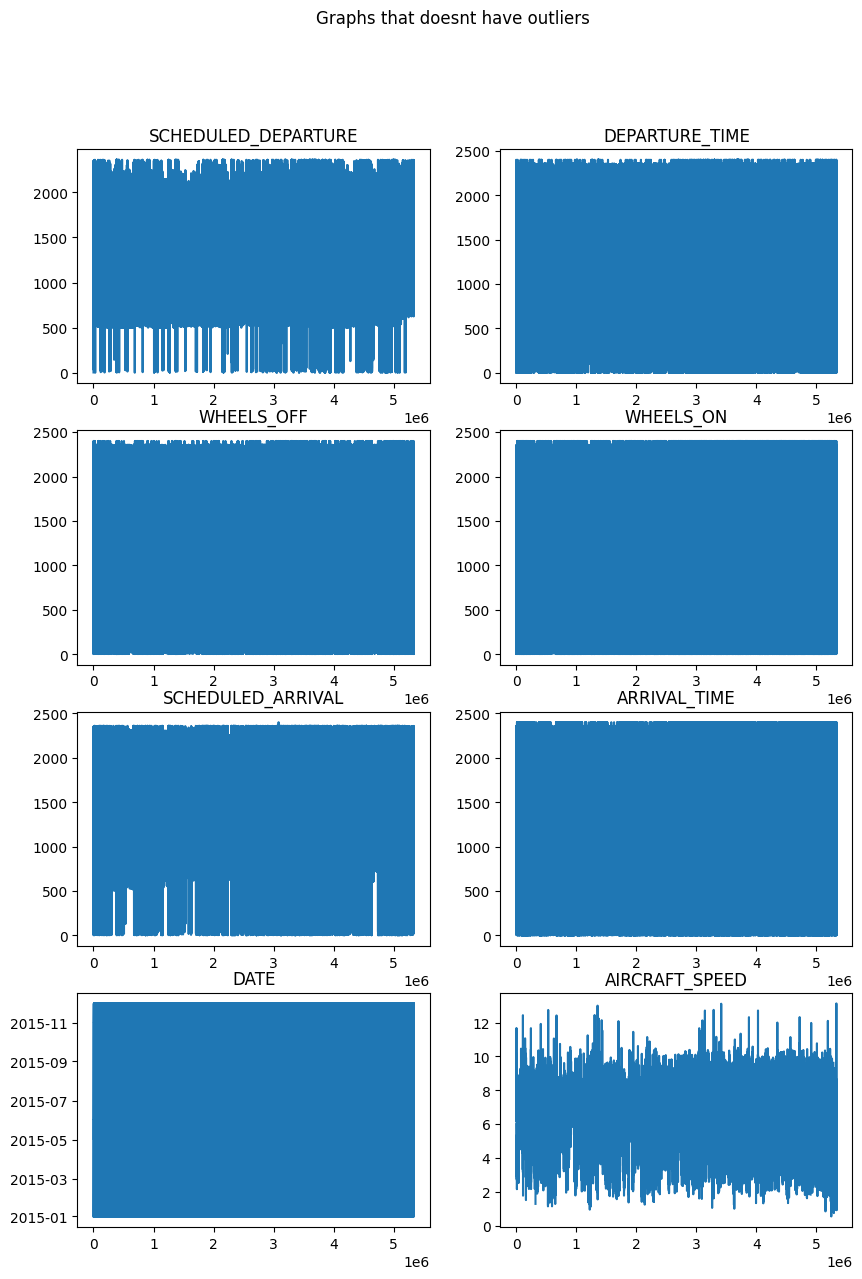

In [19]:
fig, axs = plt.subplots(4,2)
fig.set_figwidth(10)
fig.set_figheight(14)
fig.suptitle('Graphs that doesnt have outliers')
axs[0][0].plot(df['SCHEDULED_DEPARTURE'])
axs[0, 0].set_title('SCHEDULED_DEPARTURE')

axs[0][1].plot(df['DEPARTURE_TIME'])
axs[0, 1].set_title('DEPARTURE_TIME')

axs[1][0].plot(df['WHEELS_OFF'])
axs[1, 0].set_title('WHEELS_OFF')

axs[1][1].plot(df['WHEELS_ON'])
axs[1, 1].set_title('WHEELS_ON')

axs[2][0].plot(df['SCHEDULED_ARRIVAL'])
axs[2, 0].set_title('SCHEDULED_ARRIVAL')

axs[2][1].plot(df['ARRIVAL_TIME'])
axs[2, 1].set_title('ARRIVAL_TIME')

axs[3][0].plot(df['DATE'])
axs[3, 0].set_title('DATE')

axs[3][1].plot(df['AIRCRAFT_SPEED'])
axs[3, 1].set_title('AIRCRAFT_SPEED')


<h3>Now we will remove all the outliers</h3>

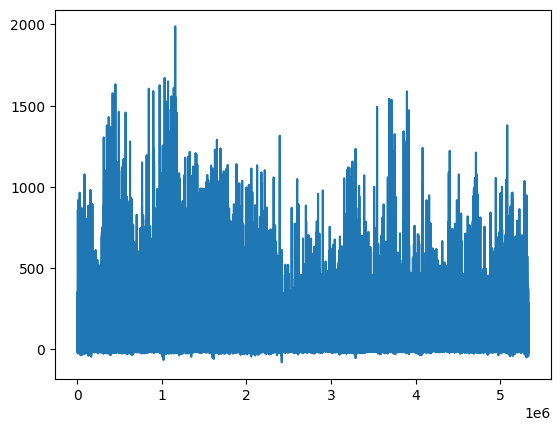

In [20]:
plt.plot(df['DEPARTURE_DELAY'])

<h5>We dropped all the rows that had a DEPARTURE_DELAY greater than 1700  </h5>

In [21]:
df = df.drop(df[df.DEPARTURE_DELAY >= 1700].index)

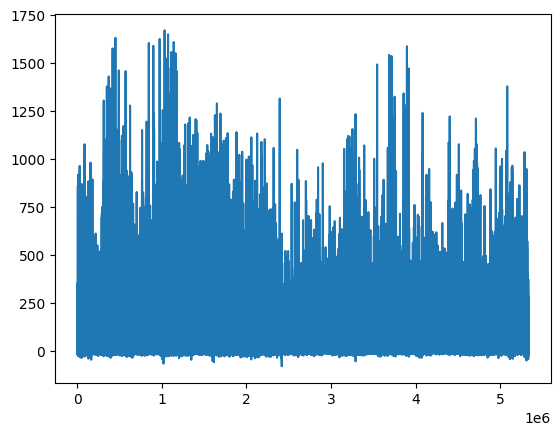

In [22]:
plt.plot(df['DEPARTURE_DELAY']) 

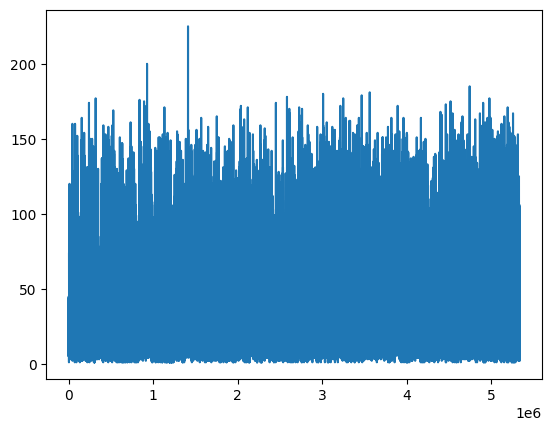

In [23]:
plt.plot(df['TAXI_OUT'])

<h5>We dropped all the rows that had a TAXI_OUT greater than 180  </h5>

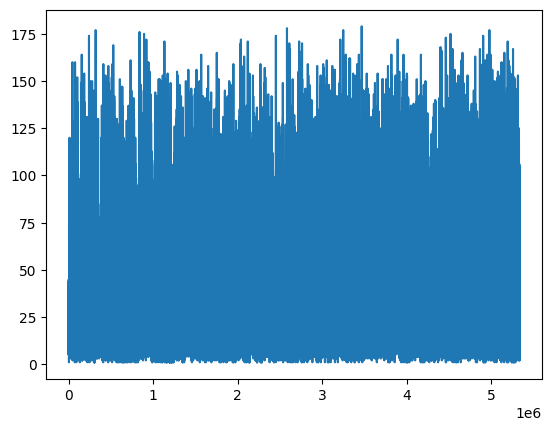

In [24]:
df = df.drop(df[df.TAXI_OUT >= 180].index)
plt.plot(df['TAXI_OUT']) 

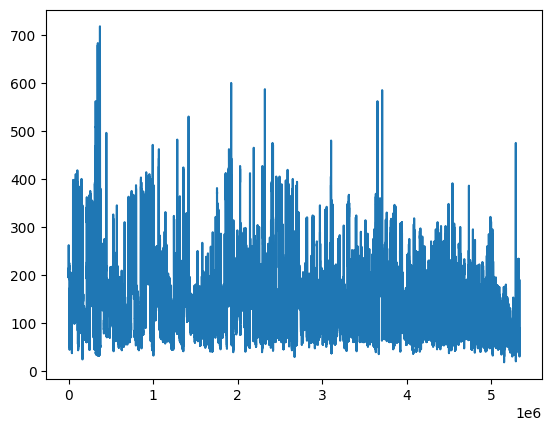

In [25]:
plt.plot(df['SCHEDULED_TIME'])

<h5>We dropped all the rows that had a SCHEDULED_TIME greater than 500  </h5>

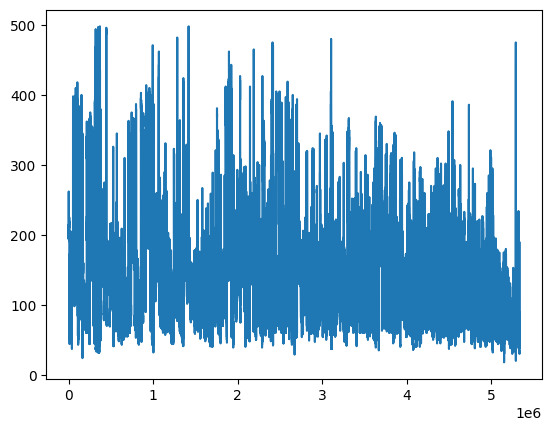

In [26]:
df = df.drop(df[df.SCHEDULED_TIME >= 500].index)
plt.plot(df['SCHEDULED_TIME']) 

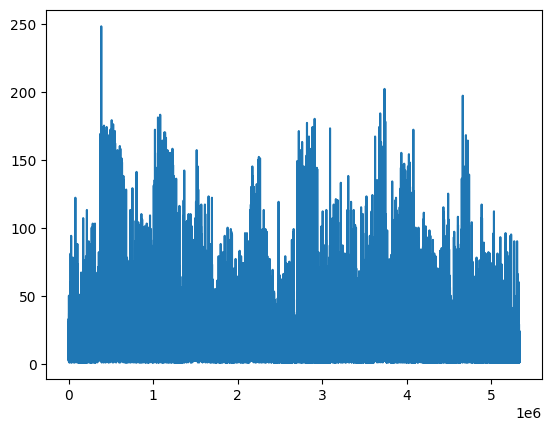

In [27]:
plt.plot(df['TAXI_IN'])# remove above 200

<h5>We dropped all the rows that had a TAXI_IN greater than 200  </h5>

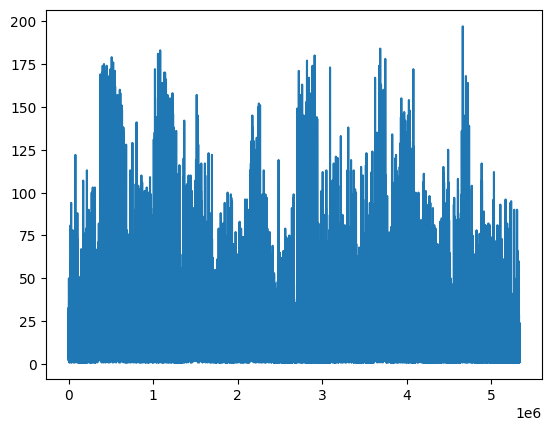

In [28]:
df = df.drop(df[df.TAXI_IN >= 200].index)
plt.plot(df['TAXI_IN']) 

<h5>Now we will change the type of FLIGHT_NUMBER from float64 to object so that the numbers can be categorized to make it easier to plot</h5>

In [29]:
df['FLIGHT_NUMBER'] = df['FLIGHT_NUMBER'].astype('object')

<h2>Data Visualization</h2>

<h5>Qestion 1: How accurate are the scheduled arrival time compared to the actual time the plane arrives? </h5>

<h5> We will now select the top 10 flight numbers that has the highest count since plotting 5 million data points will give plots that are all over the place</h5>

In [30]:
top_10_Flights = df['FLIGHT_NUMBER'].value_counts()[:10].index.tolist()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22408\1887587845.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_10_Flights = df['FLIGHT_NUMBER'].value_counts()[:10].index.tolist()


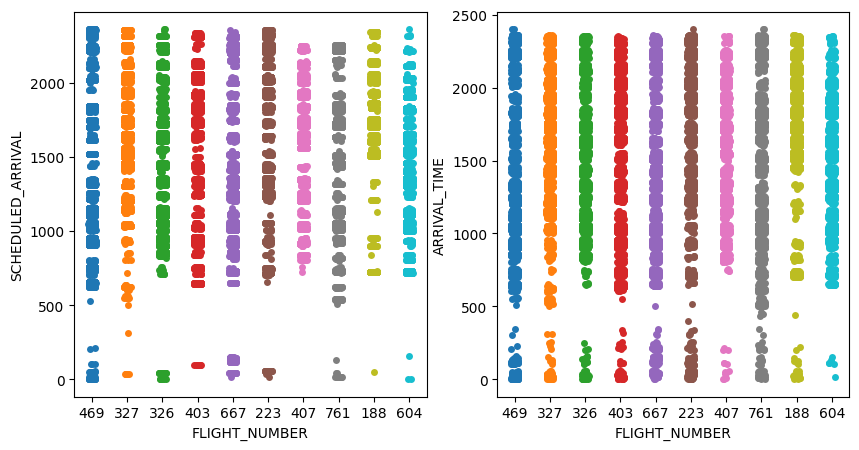

In [31]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(10)
fig.set_figheight(5)

for i in range(len(top_10_Flights)):
    flight = df['FLIGHT_NUMBER']== top_10_Flights[i]
    rows = df.loc[flight]
    sns.stripplot(x='FLIGHT_NUMBER', y='SCHEDULED_ARRIVAL', data=rows, ax=axs[0])
    
for i in range(len(top_10_Flights)):
    flight = df['FLIGHT_NUMBER']== top_10_Flights[i]
    rows = df.loc[flight]
    sns.stripplot(x='FLIGHT_NUMBER', y='ARRIVAL_TIME', data=rows, ax=axs[1])

<h5>The graph above shows the difference between the time the plane is expected to land and the actual time it landed at</h5>
<h5>As you can see the graph shows that when the scheduled arrival time is before 5 am the flights tend to be late, while flights that are scheduled after 5 am , are generally more accurate timings </h5>

<h5>Question 2: How many flights occur per month?</h5>

<AxesSubplot: xlabel='DATE', ylabel='Count'>

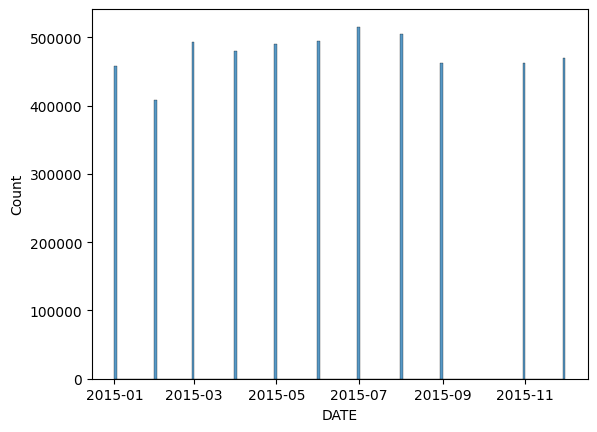

In [32]:
sns.histplot(x='DATE', data =df)


<h5>As shown in the graph above highest month was July and the least one was 10 which as shown from the data above had no flights at all</h5>

In [33]:
df.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_CITY',
       'DESTINATION_STATE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE',
       'DATE', 'AIRCRAFT_SPEED'],
      dtype='object')

<AxesSubplot: xlabel='count', ylabel='ORIGIN_CITY'>

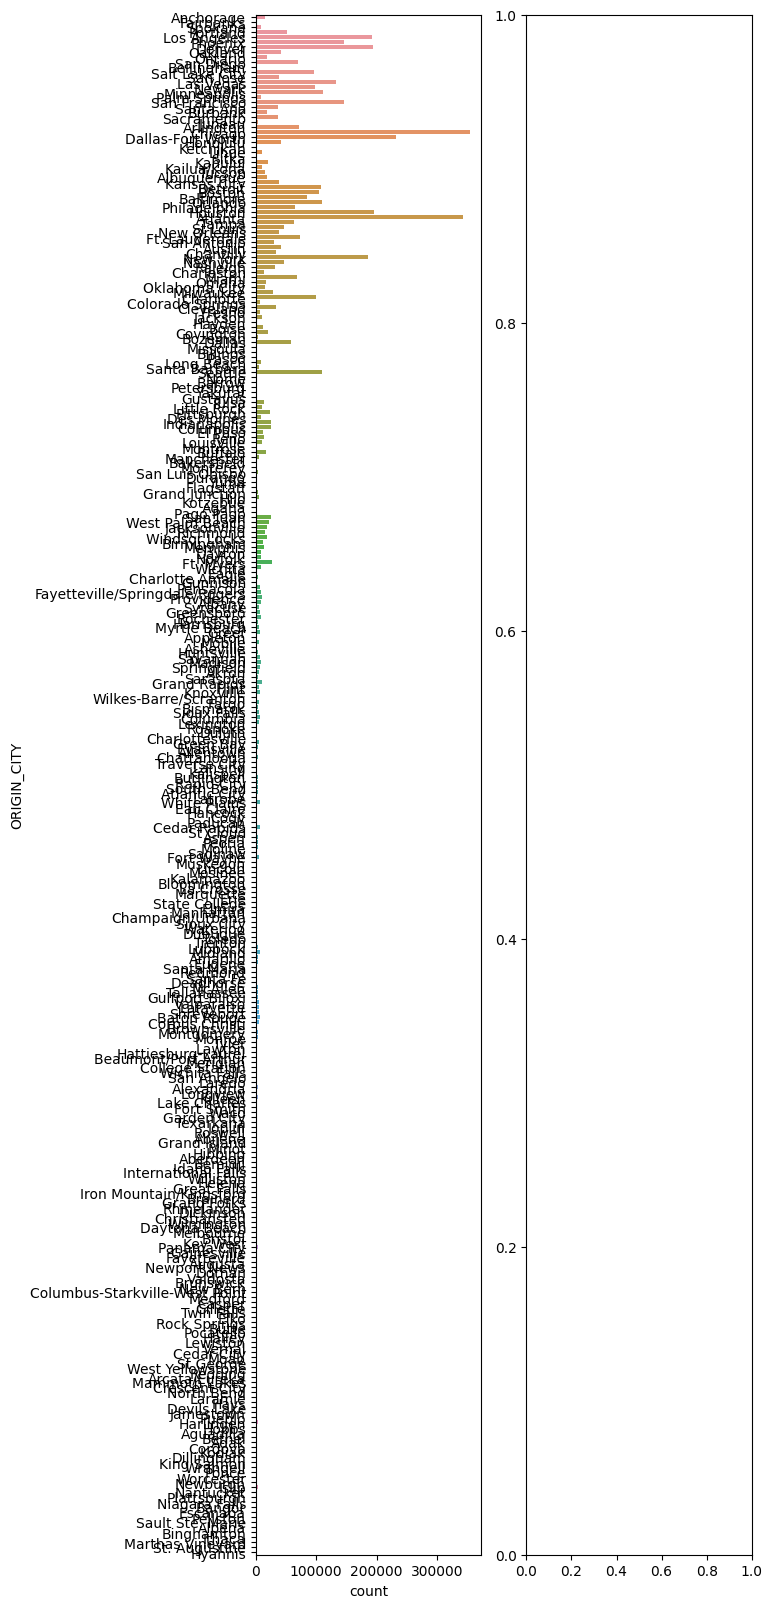

In [37]:
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(20)
sns.countplot(y= 'ORIGIN_CITY', data = df,ax=axs[0])